# CA6 for Atmospheric Thermodynamic


## CA6-1

### Import pacakges

In [1]:
import numpy as np
import Mog
import matplotlib.pyplot as plt

### Openfile and set parameters

In [2]:
H,P,T,RH = np.loadtxt(fname='46810-2018072200.edt.txt',dtype=float,usecols=(1,2,3,4),skiprows=3,delimiter=',',unpack=True)

# Turn T into Kelvin
T = T+273.15

# Find location of Tropopause
Tmin = np.amin(T)
TOS = H[3371]  

# Set perameters
Q = 0.03  # sensible heat flux [mK/s]
R = 1.2e-4  # latent heat flux [(kg*m)/(kg*s)]
Rd = Mog.Rd  # [J/K*kg]
Rv = Mog.Rv  # [J/K*kg]
epsilon = Rd/Rv
g0 = Mog.g0  # [m/s^2]
Cp = Mog.Cp  # [J/K*kg]
Lv = Mog.Lv  # [J/kg]
A = 2.53*10**9  # hPa
B = 5.42*10**3  # K

# Compute data
es = Mog.SaturationWaterVaporPressure(T)
e = es * RH * 0.01  # Water vapor pressure
qv = Mog.SpecificHumidity(P,e)
qvs = Mog.SpecificHumidity(P, es)
theta = Mog.PotentialTemp(T,P)
hm = Mog.MoistStaticEnergy(T, H, qv)
hms = Mog.MoistStaticEnergy(T, H, qvs)
Sd = Mog.DryStaticEnergy(T, H)

### Plot the vertical profiles from surface to 20 km of (1) dry static energy temperature, (2) moist static energy temperature, and (3) saturation moist static energy temperature.

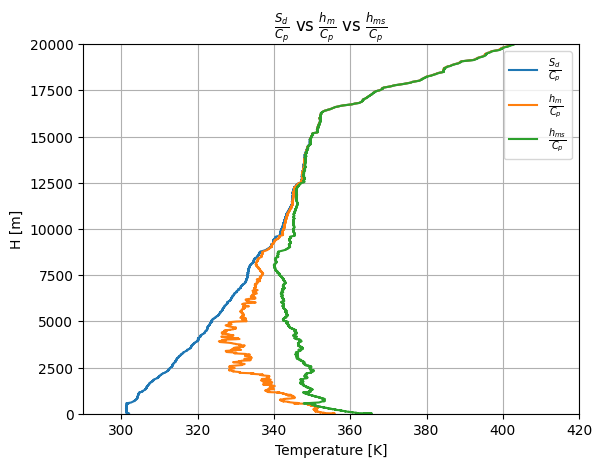

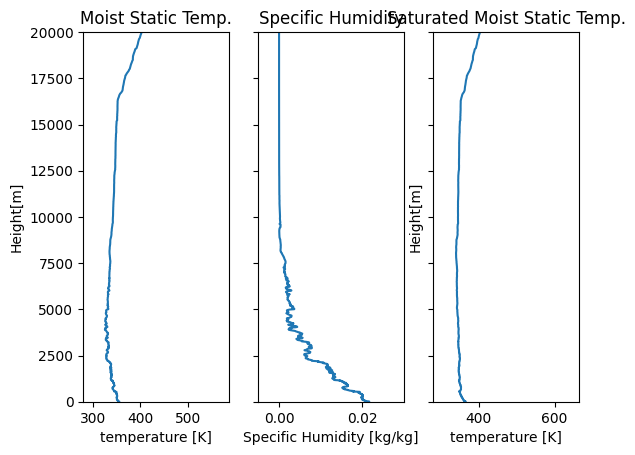

: 

In [21]:
'''
# theta
plt.plot(theta, H, alpha = 1)
plt.xlabel(r'$\theta$ [K]')
plt.ylabel('H [m]')
plt.ylim(0,20000)
plt.xlim(290,420)
plt.title(r'H versus $\theta$')
plt.legend([r'$\theta$'])
plt.grid()
plt.show()

# Sd
plt.plot(Sd/Cp, H, alpha = 1)
plt.xlabel(r'$\frac{S_d}{C_p}$ [K]')
plt.ylabel('H [m]')
plt.ylim(0,20000)
plt.xlim(290,420)
plt.title(r'H versus Dry Static Energy Temperature ($\frac{S_d}{C_p}$)')
plt.legend([r'$\frac{S_d}{C_p}$'])
plt.grid()
plt.show()

# hm
plt.plot(hm/Cp, H, alpha = 1)
plt.xlabel(r'$\frac{h_m}{C_p}$ [K]')
plt.ylabel('H [m]')
plt.ylim(0,20000)
plt.xlim(290,420)
plt.title(r'H versus Moist Static Energy Temperature ($\frac{h_m}{C_p}$)')
plt.legend([r'$\frac{h_m}{C_p}$'])
plt.grid()
plt.show()

# hms
plt.plot(hms/Cp, H, alpha = 1)
plt.xlabel(r'$\frac{h_{ms}}{C_p}$ [K]')
plt.ylabel('H [m]')
plt.ylim(0,20000)
plt.xlim(290,420)
plt.title(r'H versus Saturated Moist Static Energy Tepmerature ($\frac{h_{ms}}{C_p}$)')
plt.legend([r'$\frac{h_{ms}}{C_p}$'])
plt.grid()
plt.show()
'''

# Sd vs hm vs hms
plt.plot(Sd/Cp, H, alpha = 1)
plt.plot(hm/Cp, H, alpha = 1)
plt.plot(hms/Cp, H, alpha = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('H [m]')
plt.ylim(0,20000)
plt.xlim(290,420)
plt.title(r'$\frac{S_{d}}{C_p}$ vs $\frac{h_{m}}{C_p}$ vs $\frac{h_{ms}}{C_p}$')
plt.legend([r'$\frac{S_{d}}{C_p}$',r'$\frac{h_{m}}{C_p}$',r'$\frac{h_{ms}}{C_p}$'])
plt.grid()
plt.show()

# hm hms vs qv
f,ax = plt.subplots(1,3,sharey='row')
ax[0].plot(hm/Mog.Cp,H)
#ax[0].legend(['Relative Humidity(B)'])
ax[0].set_ylim(0,20000)
ax[0].set_xlim(280,)
ax[0].set_title('Moist Static Temp.')
ax[0].set_xlabel('temperature [K]')
ax[0].set_ylabel('Height[m]')

ax[1].plot(qv,H,)
ax[1].set_ylim(0,20000)
ax[1].set_xlim(-0.005,0.03)
#ax[1].legend(['Specific humidity'])
ax[1].set_title('Specific Humidity')
ax[1].set_xlabel('Specific Humidity [kg/kg]')

ax[2].plot(hms/Mog.Cp,H)
#ax[2].legend(['Saturated Static Temp.'])
ax[2].set_ylim(0,20000)
ax[2].set_xlim(280,)
ax[2].set_title('Saturated Moist Static Temp.')
ax[2].set_xlabel('temperature [K]')
ax[2].set_ylabel('Height[m]')
plt.show()


In [12]:
hm_min_index = np.argmin(hm)
print('Lowest hm/Cp =',hm[hm_min_index]/Mog.Cp, '[K] at',H[hm_min_index], 'm')

Lowest hm/Cp = 325.56711774321775 [K] at 3918.0 m


## CA6-2

### Given the heating and moistening rate as CA5, calculate the time needed for the well-mixed PBL can develop to 1500m.

In [4]:
def area_under_curve(array, datalocation):
    """
    Computes the area under the curve with respect to the y-axis of an NDarray using the trapezoidal rule.
    """
    area = 0
    if datalocation == 0:
        return 0.5*(H[0]-0)*(array[0])
    else:
        area = 0.5*(H[0]-0)*(array[0])
        for i in range(datalocation):
            dx = H[i+1] - H[i]
            area += (0.5 * dx * (array[i+1] + array[i]))
        return area

h_index = np.argmin(np.abs(H - 1500))
mixing_time = (theta[h_index] * (H[h_index] - H[0]) - np.trapz(theta[0:h_index+1], H[0:h_index+1])) / Q
qvm = (np.trapz(qv[0:h_index+1], H[0:h_index+1]) + R * mixing_time) / H[h_index]
print('PBL needs', int(mixing_time // 3600), 'hr', round((mixing_time % 3600) / 60, 2), 'min to developing to 1500 m high.')


print(h_index)  # 308
print(H[h_index])  # 1501 [m]

thetam = theta[h_index]
print(thetam)  # 306.487 [K]

qt_mix = qv.copy()
qt_mix[:h_index+1] = qvm

theta_mix = theta.copy()
theta_mix[:h_index+1] = thetam


PBL needs 46 hr 43.23 min to developing to 1500 m high.
308
1501.0
306.4866632779695


### Plot $\theta_{mix}$ and $q_{v,mix}$

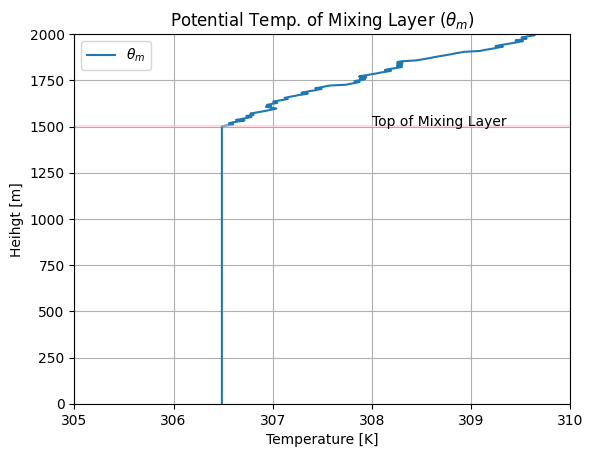

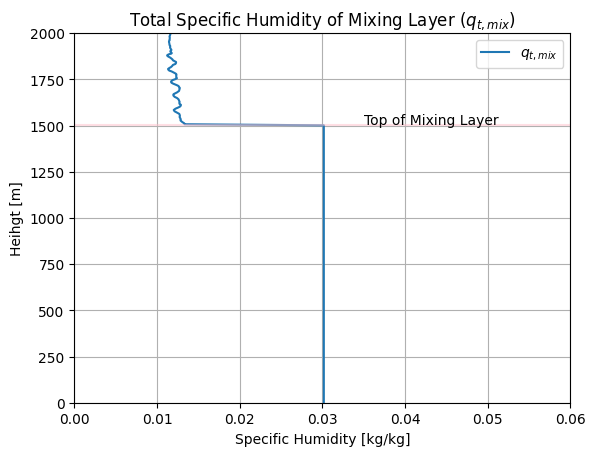

In [5]:
plt.plot(theta_mix,H)
plt.xlim(305,310)
plt.ylim(0,2000)
plt.text(x = 308, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Temperature [K]')
plt.ylabel('Heihgt [m]')
plt.title(r'Potential Temp. of Mixing Layer ($\theta_m$)')
plt.legend([r'$\theta_{m}$'])
plt.grid()
plt.show()

plt.plot(qt_mix,H)
plt.xlim(0,0.06)
plt.ylim(0,2000)
plt.text(x = 0.035, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Specific Humidity [kg/kg]')
plt.ylabel('Heihgt [m]')
plt.title('Total Specific Humidity of Mixing Layer ($q_{t,mix}$)')
plt.legend(['$q_{t,mix}$'])
plt.grid()
plt.show()

### Calculate and plot $T_{mix}$, $q_{vs,mix}$, $e_{mix}$,and $e_{s,mix}$

The height of cloud base is 262.0 m


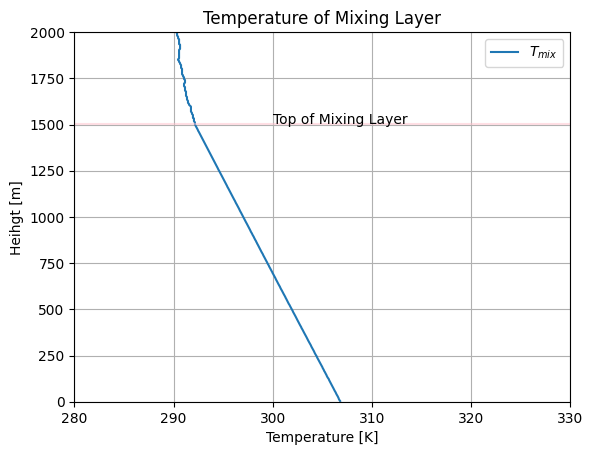

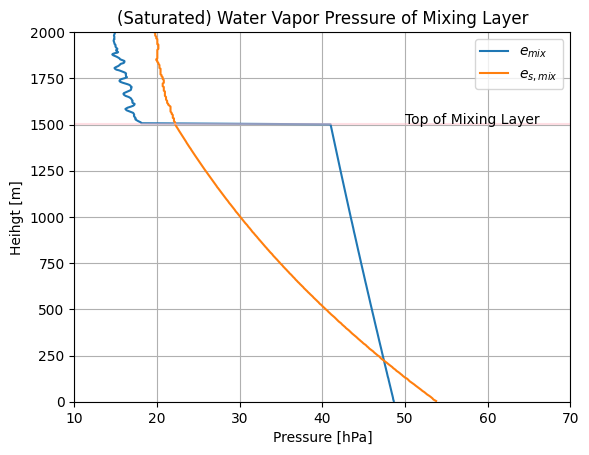

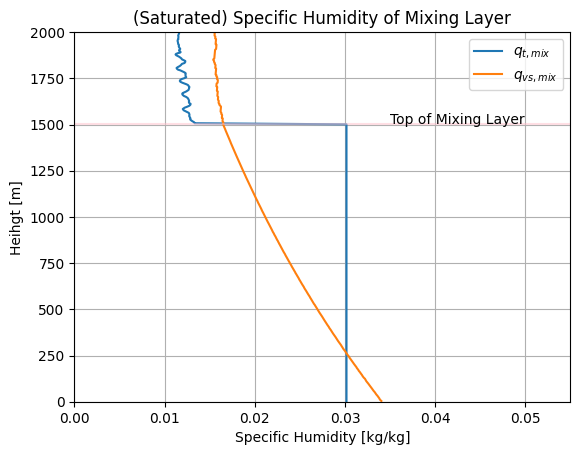

In [6]:
T_mix = theta_mix / (1000/P)**(Rd/Cp)
e_mix = qt_mix * P / epsilon
es_mix = Mog.SaturationWaterVaporPressure(T_mix)
qvs_mix = Mog.SpecificHumidity(P,es_mix)

no_cond = True
for i in range(h_index):
    if qvm >= Mog.SpecificHumidity(P[i], Mog.SaturationWaterVaporPressure(T_mix[i])):
        cloud_base = i
        no_cond = False
        break
if no_cond:
    for i in range(h_index, len(RH)):
        if RH[i] == 100:
            cloud_base = i
            no_cond = False
            break
if no_cond:
    print('No cloud base (whole environment unsaturated)')
else:
    print('The height of cloud base is', H[cloud_base], 'm')


plt.plot(T_mix,H)
plt.xlim(280,330)
plt.ylim(0,2000)
plt.text(x = 300, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Temperature [K]')
plt.ylabel('Heihgt [m]')
plt.title('Temperature of Mixing Layer')
plt.legend(['$T_{mix}$'])
plt.grid()
plt.show()

plt.plot(e_mix,H)
plt.plot(es_mix,H)
plt.xlim(10,70)
plt.ylim(0,2000)
plt.text(x = 50, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Pressure [hPa]')
plt.ylabel('Heihgt [m]')
plt.title('(Saturated) Water Vapor Pressure of Mixing Layer')
plt.legend(['$e_{mix}$','$e_{s,mix}$'])
plt.grid()
plt.show()

plt.plot(qt_mix,H)
plt.plot(qvs_mix,H)
plt.xlim(0,0.055)
plt.ylim(0,2000)
plt.text(x = 0.035, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Specific Humidity [kg/kg]')
plt.ylabel('Heihgt [m]')
plt.title('(Saturated) Specific Humidity of Mixing Layer')
plt.legend(['$q_{t,mix}$','$q_{vs,mix}$'])
plt.grid()
plt.show()


## Deal with condensation

In [7]:

def BisectionMethod(f, i, x1, x2, tolerance=1e-6):
    j = 0  # Initialize iteration counter
    if (x1 < x2) and (f(x1,i) * f(x2,i)) < 0:  # Check if the function values at x1 and x2 have opposite signs
        while (x2 - x1) >= tolerance:  # Loop until the interval between x1 and x2 is smaller than the tolerance
            j += 1  # Increment iteration counter
            x3 = (x2 + x1) / 2  # Compute the midpoint of x1 and x2
            if (f(x1,i) * f(x3,i)) < 0:  # Check if the function values at x1 and x3 have opposite signs
                x2 = x3  # Update x2 to x3
            elif (f(x1,i) * f(x3,i)) > 0:  # Check if the function values at x1 and x3 have the same sign
                x1 = x3  # Update x1 to x3
            elif (f(x3,i) == 0):  # Check if x3 is a root (i.e., f(x3) = 0)
                return x3  # Return the root
            else:
                print('Error')  # Print an error message if none of the above conditions are met
                return 0
            #print('current ans= ', (x1 + x2) / 2, ' ,iterate times: ', j)  # Print the current approximation and iteration count
        return ((x1 + x2) / 2)  # Return the final approximation
    elif (f(x1,i) == 0):  # Check if x1 is a root (i.e., f(x1) = 0)
        return x1  # Return x1 as the root
    elif (f(x2,i) == 0):  # Check if x2 is a root (i.e., f(x2) = 0)
        return x2  # Return x2 as the root
    else:
        print('Invalid Input')  # Print an error message if the input is invalid
        return 0


qvm_0 = qt_mix
qvs_0 = qvs_mix

qvm_1 = qvm_0.copy()
qvs_1 = qvs_0.copy()


def f(T2, i):
    f = Mog.SpecificHumidity(P[i], Mog.SaturationWaterVaporPressure(T2)) - Mog.SpecificHumidity(P[i], Mog.SaturationWaterVaporPressure(T_mix[i])) + Cp/Lv * (T_mix[i] - T2) - (qvs_0[i] - qvm_0[i])
    return f

T_cond = np.zeros(len(T_mix))

for i in range(np.where(qvm_0>=qvs_0)[0][0],np.where(qvm_0>=qvs_0)[0][-1]+1):
    T_cond[i] = BisectionMethod(f,i,200,400,1e-7)

T_cond[T_cond==0] = T_mix[T_cond==0]

Theta_cond = Mog.PotentialTemp(T_cond,P)

qvs_cond = Mog.SpecificHumidity(P, Mog.SaturationWaterVaporPressure(T_cond))

em_cond = qvm_1 * P / epsilon
es_cond = Mog.SaturationWaterVaporPressure(T_cond)
em0 = qvm_0 * P / epsilon
es0 = qvs_0 * P / epsilon


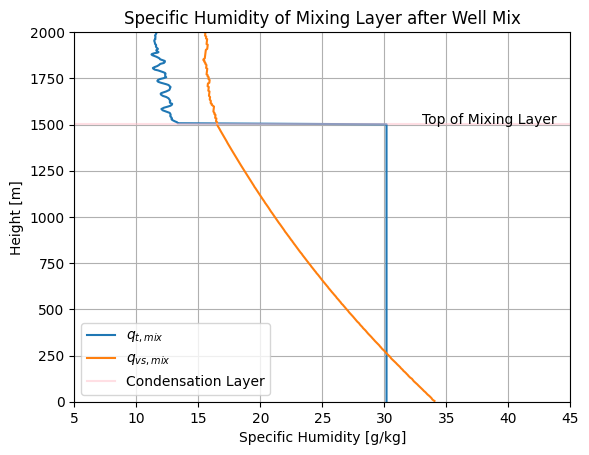

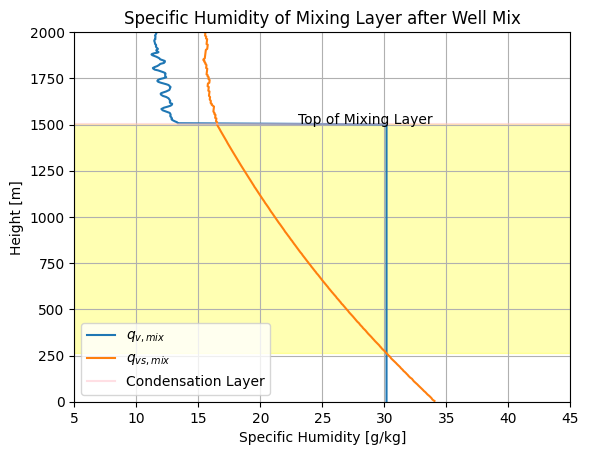

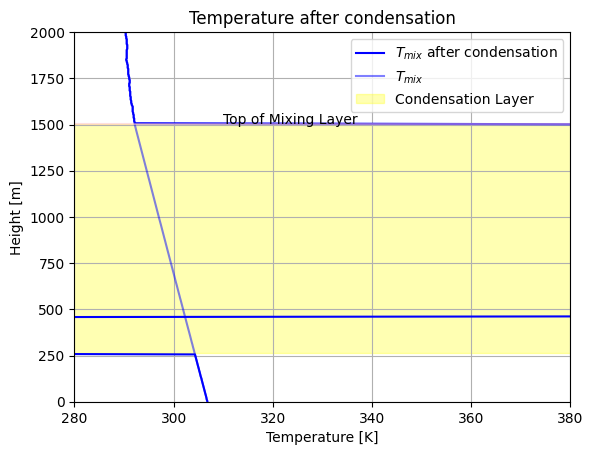

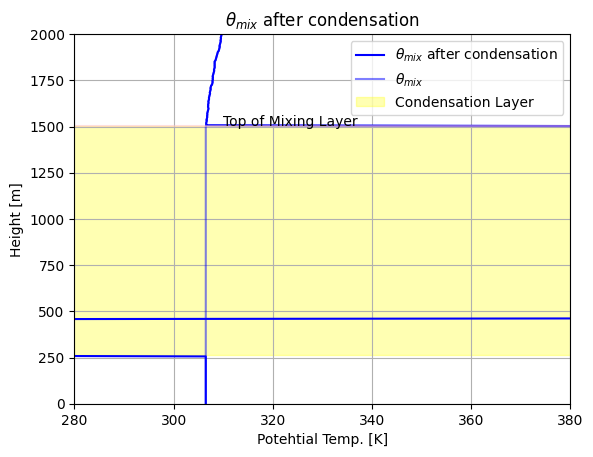

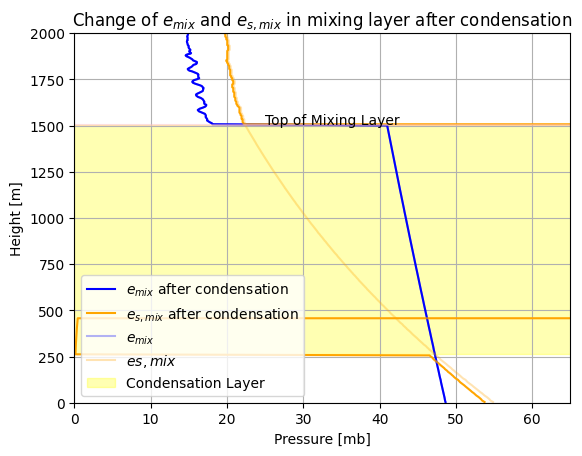

"\nplt.plot(RHc, H)\nplt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)\nplt.axhline(y = H[308], color = 'red', alpha = 0.5)\nplt.text(x = 10, y = H[308] + 5, s = 'Top of Mixing Layer')\nplt.xlim(0,120)\nplt.ylim(0,2000)\nplt.xlabel('Relative Humidity [%]')\nplt.ylabel('Height [m]')\nplt.title('Relative Humidity of Mixing Layer\n (well mixed, condensation considered)')\nplt.legend(['RH > 100%'])\nplt.grid()\nplt.show()\n"

In [8]:
plt.plot(qvm_0 * 1000, H)
plt.plot(qvs_0 * 1000, H)
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.text(x = 33, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.ylim(0,2000)
plt.xlim(5,45)
plt.legend(['$q_{t,mix}$','$q_{vs,mix}$','Condensation Layer'], loc = 'lower left')
plt.xlabel('Specific Humidity [g/kg]')
plt.ylabel('Height [m]')
plt.title('Specific Humidity of Mixing Layer after Well Mix')
plt.grid()
plt.show()

plt.plot(qvm_1 * 1000, H)
plt.plot(qvs_1 * 1000, H)
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.text(x = 23, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.fill_between((5, 45), H[cloud_base], H[308], color = 'yellow',alpha = 0.3)
plt.ylim(0,2000)
plt.xlim(5,45)
plt.legend(['$q_{v,mix}$','$q_{vs,mix}$','Condensation Layer'], loc = 'lower left')
plt.xlabel('Specific Humidity [g/kg]')
plt.ylabel('Height [m]')
plt.title('Specific Humidity of Mixing Layer after Well Mix')
plt.grid()
plt.show()

plt.plot(T_cond, H, 'blue')
plt.plot(T_mix, H, 'blue', alpha = 0.5)
plt.fill_between((0, 500), H[cloud_base], H[308], color = 'yellow',alpha = 0.3)
plt.text(x = 310, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.ylim(0,2000)
plt.xlim(280,380)
plt.xlabel('Temperature [K]')
plt.ylabel('Height [m]')
plt.legend(['$T_{mix}$ after condensation', '$T_{mix}$','Condensation Layer'])
plt.title('Temperature after condensation')
plt.grid()
plt.show()

plt.plot(Theta_cond, H, 'blue')
plt.plot(theta_mix, H, color = 'blue', alpha = 0.5)
plt.text(x = 310, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.fill_between((0, 500), H[cloud_base], H[308], color = 'yellow',alpha = 0.3)
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.xlabel('Potehtial Temp. [K]')
plt.ylabel('Height [m]')
plt.ylim(0,2000)
plt.xlim(280,380)
plt.legend([r'$\theta_{mix}$ after condensation', r'$\theta_{mix}$','Condensation Layer'])
plt.title(r'$\theta_{mix}$ after condensation')
plt.grid()
plt.show()

plt.plot(em_cond, H, color = 'blue')
plt.plot(es_cond, H, color = 'orange')
plt.plot(em0, H, color = 'blue', alpha = 0.3)
plt.plot(es0, H, color = 'orange', alpha = 0.3)
plt.text(x = 25, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.fill_between((0, 70), H[cloud_base], H[308], color = 'yellow',alpha = 0.3)
plt.axhline(y = H[308], color = 'pink',alpha = 0.5)
plt.legend(['$e_{mix}$ after condensation','$e_{s,mix}$ after condensation','$e_{mix}$','$e_{}s,mix$','Condensation Layer'])
plt.xlabel('Pressure [mb]')
plt.ylabel('Height [m]')
plt.title('Change of $e_{mix}$ and $e_{s,mix}$ in mixing layer after condensation')
plt.ylim(0,2000)
plt.xlim(0,65)
plt.grid()
plt.show()

'''
plt.plot(RHc, H)
plt.fill_between((100,200), 0, H[-1], color = 'pink', alpha = 0.5)
plt.axhline(y = H[308], color = 'red', alpha = 0.5)
plt.text(x = 10, y = H[308] + 5, s = 'Top of Mixing Layer')
plt.xlim(0,120)
plt.ylim(0,2000)
plt.xlabel('Relative Humidity [%]')
plt.ylabel('Height [m]')
plt.title('Relative Humidity of Mixing Layer\n (well mixed, condensation considered)')
plt.legend(['RH > 100%'])
plt.grid()
plt.show()
'''